----

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from textblob import TextBlob

датасет - комментарии к ютубу

https://www.kaggle.com/datasets/harshvardhan21/us-comments-cleaned-dataset-for-sentiment-analysis

In [2]:
data = pd.read_csv("US_comments_Cleaned.csv", engine='python', encoding='utf-8', on_bad_lines='skip', nrows=10000)

In [3]:
data.head()

,Unnamed: 0,video_id,comment_text,likes,replies
0,0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,4,XpVt6Z1Gjjo,trending 😉,3,0


## задание 2
автоматическое присваивание меток

In [4]:
# Определение функции для получения полярности настроения комментария
def get_sentiment(comment):
    blob = TextBlob(comment)
    return blob.sentiment.polarity

In [5]:
data_marked = data.copy(deep=True)
data_marked['sentiment'] = data['comment_text'].apply(get_sentiment)

In [6]:
data_marked.tail()

,Unnamed: 0,video_id,comment_text,likes,replies,sentiment
9995,9996,lwOQbMcXtfU,All the people saying a Tsunami is coming... 🙄,0,0,0.000000
9996,9997,lwOQbMcXtfU,Lools like the glowing sea in fallout,0,0,0.000000
9997,9998,lwOQbMcXtfU,The Simpsons were right again!,0,0,0.357143
9998,9999,lwOQbMcXtfU,So is the water back?,0,0,0.000000
9999,10000,lwOQbMcXtfU,"So that's it huh, we're some kind of dried up ...",0,0,0.200000


<Axes: >

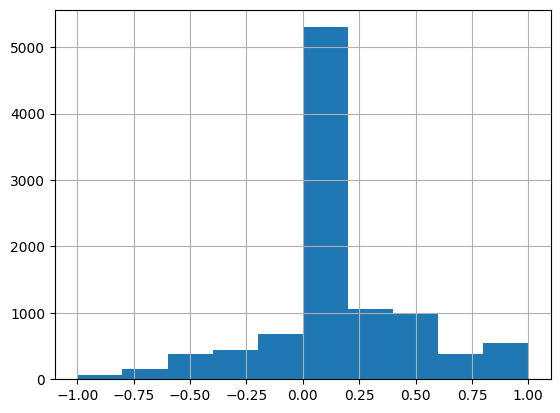

In [7]:
data_marked['sentiment'].hist()

In [8]:
# Определение функции для присвоения метки настроения на основе оценки полярности настроения
def get_sentiment_label(score):
    level = 0.1
    if score < -level:
        return -1
    if score > level:
        return 1
    else:
        return 0

In [9]:
data_marked['sentiment_label'] = data_marked['sentiment'].apply(get_sentiment_label)

In [10]:
data_marked['sentiment_label'].value_counts()

sentiment_label
 0    4994
 1    3694
-1    1312
Name: count, dtype: int64

## задание 3
ручная разметка

In [11]:
data_human_part = data.sample(frac=0.01)

In [12]:
data.shape

(10000, 5)

In [13]:
data_human_part.shape

(100, 5)

In [14]:
data_human_part.to_csv('US_comments_to_human_data_labeling.csv', index=False)

In [15]:
data_human_part2 = pd.read_csv('US_comments_from_human_data_labeling.csv', engine='python', encoding='utf-8', on_bad_lines='skip')
data_human_part2.head()

,Unnamed: 0,annotation_id,annotator,comment_text,created_at,id,lead_time,likes,replies,sentiment,updated_at,video_id
0,9785,15,1,Doesn't your arms get tired from all this cand...,2025-01-04T13:20:02.956951Z,1104,11.158,0,0,0,2025-01-04T13:20:02.956951Z,3x-sUsazQ90
1,8919,16,1,I swear Alisha's intros are literally the best,2025-01-04T13:20:09.239655Z,1105,4.996,1,0,1,2025-01-04T13:20:09.239655Z,OudFElslbh4
2,7540,17,1,Nice you made it to trending,2025-01-04T13:20:15.535290Z,1106,5.258,0,0,1,2025-01-04T13:20:15.535290Z,NoxKH_v8b-8
3,2812,18,1,http://www.caboodles.com/,2025-01-04T13:20:18.489924Z,1107,2.028,0,0,0,2025-01-04T13:20:18.489924Z,2wxyDrfwlXQ
4,5166,19,1,F U S I O N,2025-01-04T13:20:24.164267Z,1108,4.281,0,0,0,2025-01-04T13:20:24.164267Z,IMG0u0_cKNc


In [16]:
data_human_part2 = data_human_part2.set_index('Unnamed: 0')
data_human_part2.head()

,annotation_id,annotator,comment_text,created_at,id,lead_time,likes,replies,sentiment,updated_at,video_id
Unnamed: 0,,,,,,,,,,,
9785,15,1,Doesn't your arms get tired from all this cand...,2025-01-04T13:20:02.956951Z,1104,11.158,0,0,0,2025-01-04T13:20:02.956951Z,3x-sUsazQ90
8919,16,1,I swear Alisha's intros are literally the best,2025-01-04T13:20:09.239655Z,1105,4.996,1,0,1,2025-01-04T13:20:09.239655Z,OudFElslbh4
7540,17,1,Nice you made it to trending,2025-01-04T13:20:15.535290Z,1106,5.258,0,0,1,2025-01-04T13:20:15.535290Z,NoxKH_v8b-8
2812,18,1,http://www.caboodles.com/,2025-01-04T13:20:18.489924Z,1107,2.028,0,0,0,2025-01-04T13:20:18.489924Z,2wxyDrfwlXQ
5166,19,1,F U S I O N,2025-01-04T13:20:24.164267Z,1108,4.281,0,0,0,2025-01-04T13:20:24.164267Z,IMG0u0_cKNc


## часть 4
объединить данные

In [17]:
data_marked.loc[data_human_part2.index, 'sentiment_label'] = data_human_part2['sentiment']

In [18]:
data_marked.shape

(10000, 7)

In [19]:
data_marked.head()

,Unnamed: 0,video_id,comment_text,likes,replies,sentiment,sentiment_label
0,0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0,1
1,1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0,0
2,2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0,0
3,3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0,0
4,4,XpVt6Z1Gjjo,trending 😉,3,0,0.0,0


<Axes: >

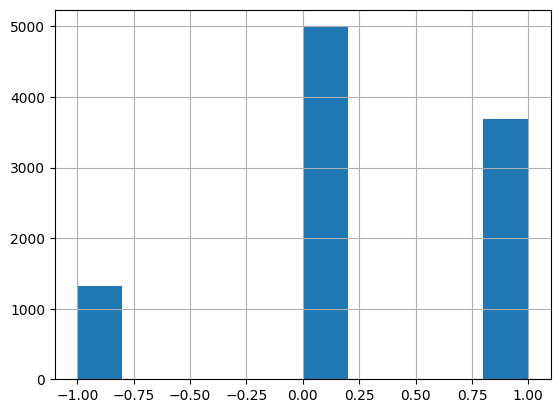

In [20]:
data_marked['sentiment_label'].hist()

# часть 5
обучить модель данных

In [21]:
labeled_marks, unlabeled_marks = train_test_split(data_marked, train_size=0.2, random_state=56)

In [22]:
labeled_marks.head()

,Unnamed: 0,video_id,comment_text,likes,replies,sentiment,sentiment_label
6774,6775,ah8SQNOXgrQ,My name is carol and I don't know if I should ...,0,0,-0.041667,0
7478,7479,NoxKH_v8b-8,It's distracting that you are making your hurr...,0,0,-0.500000,-1
3950,3951,O78Lpo4ctSE,shit i love this band so much,0,0,0.166667,1
8274,8275,B_CHjYoqPUU,If you like this you would like mine. https://...,0,0,0.000000,0
7816,7817,JsTptu56GM8,0:50 ...sending the wrong *worms* I see what ...,2,0,0.250000,1


In [23]:
unlabeled_marks.head()

,Unnamed: 0,video_id,comment_text,likes,replies,sentiment,sentiment_label
4941,4942,NzRuDD0iYC0,https://goo.gl/mv3zi3,0,0,0.0,0
5927,5928,GpAuCG6iUcA,I used to Watch porn Now I get that in movies.,1,0,0.0,0
8947,8948,gmXuUgB7T3Y,I still remember when you used to wear that pa...,0,0,0.0,0
482,482,cMKX2tE5Luk,Best remake ever!,1,0,1.0,1
8268,8269,B_CHjYoqPUU,*IS SHE INTO YOU?*,0,0,0.0,-1


In [24]:
def train_model(labeled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labeled_data['comment_text'])
    y = labeled_data['sentiment_label']
    model = LogisticRegression()
    model.fit(x, y)
    return model, vect

model, vect = train_model(labeled_marks)

In [25]:
x_unlabeled = vect.transform(unlabeled_marks['comment_text'])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [26]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainly = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [27]:
uncertainly

array([0.78475842, 1.19245232, 1.26917313, ..., 1.26081007, 1.08487504,
       1.21903988], shape=(8000,))

In [28]:
print(uncertainly[uncertainly.argsort()[0]], uncertainly[uncertainly.argsort()[-1]])

0.026599922809667033 1.5849126953934682


In [29]:
labeled_new = unlabeled_marks.iloc[uncertainly.argsort()[:100]]
unlabeled_new = unlabeled_marks.iloc[uncertainly.argsort()[100:]]

In [30]:
labeled_new

,Unnamed: 0,video_id,comment_text,likes,replies,sentiment,sentiment_label
1537,1538,ZQK1F0wz6z4,Lol!! This is so great! I love it so much! I l...,0,0,0.820312,1
1706,1707,w8fAellnPns,😛good love to video love love🌳🌽🎃🚣🚂,0,0,0.500000,1
1526,1527,ZQK1F0wz6z4,Lol love it cos it's so true!!!,0,0,0.661198,1
2807,2808,2wxyDrfwlXQ,AMAZING lol,0,0,0.700000,1
5534,5535,c7ymY8QEB2g,AMAZING! I love the messages in your music and...,2,0,0.568750,1
...,...,...,...,...,...,...,...
8979,8980,gmXuUgB7T3Y,I love your videos 😍❤❤,0,0,0.500000,1
2538,2539,LcZ2AuvxXNA,i love your videos,0,0,0.500000,1
5474,5475,EmjMWi0MBXQ,Chunky is good,7,4,0.700000,1
7771,7772,JsTptu56GM8,Really amazing video quality. Something very d...,0,0,0.366667,1


In [31]:
unlabeled_new

,Unnamed: 0,video_id,comment_text,likes,replies,sentiment,sentiment_label
8855,8856,OudFElslbh4,OMG I absolutely love the new introBIG fan lov...,0,0,0.378788,1
29,29,XpVt6Z1Gjjo,I love you so much I love to meet you But I li...,0,0,0.344481,1
4239,4240,zTjcPeb2Gwg,"Nice video dude , I love your vlog",0,0,0.550000,1
8770,8771,amds5iNvFD4,This video was great! ❤️ really informative! (...,0,0,0.583333,1
2871,2872,2wxyDrfwlXQ,I'd love to see more videos like this!,0,0,0.562500,1
...,...,...,...,...,...,...,...
7065,7066,-JmNKGfFj7w,Jim Carrey watched too much Black Mirror,0,1,-0.166667,-1
1200,1200,4MkC65emkG4,JJ Watt did more than all these fake people co...,3,0,0.000000,0
1020,1020,CsdzflTXBVQ,What a fucking loser. It took him 9 rounds to ...,0,0,-0.533333,-1
6068,6069,eRDxDEhEgNY,To bad that didn't win the cowboys a super bow...,0,0,0.144444,1


In [32]:
labeled_marks = pd.concat([labeled_marks, labeled_new])

In [33]:
labeled_marks

,Unnamed: 0,video_id,comment_text,likes,replies,sentiment,sentiment_label
6774,6775,ah8SQNOXgrQ,My name is carol and I don't know if I should ...,0,0,-0.041667,0
7478,7479,NoxKH_v8b-8,It's distracting that you are making your hurr...,0,0,-0.500000,-1
3950,3951,O78Lpo4ctSE,shit i love this band so much,0,0,0.166667,1
8274,8275,B_CHjYoqPUU,If you like this you would like mine. https://...,0,0,0.000000,0
7816,7817,JsTptu56GM8,0:50 ...sending the wrong *worms* I see what ...,2,0,0.250000,1
...,...,...,...,...,...,...,...
8979,8980,gmXuUgB7T3Y,I love your videos 😍❤❤,0,0,0.500000,1
2538,2539,LcZ2AuvxXNA,i love your videos,0,0,0.500000,1
5474,5475,EmjMWi0MBXQ,Chunky is good,7,4,0.700000,1
7771,7772,JsTptu56GM8,Really amazing video quality. Something very d...,0,0,0.366667,1


In [34]:
unlabeled_marks.iloc[uncertainly.argsort()]

,Unnamed: 0,video_id,comment_text,likes,replies,sentiment,sentiment_label
1537,1538,ZQK1F0wz6z4,Lol!! This is so great! I love it so much! I l...,0,0,0.820312,1
1706,1707,w8fAellnPns,😛good love to video love love🌳🌽🎃🚣🚂,0,0,0.500000,1
1526,1527,ZQK1F0wz6z4,Lol love it cos it's so true!!!,0,0,0.661198,1
2807,2808,2wxyDrfwlXQ,AMAZING lol,0,0,0.700000,1
5534,5535,c7ymY8QEB2g,AMAZING! I love the messages in your music and...,2,0,0.568750,1
...,...,...,...,...,...,...,...
7065,7066,-JmNKGfFj7w,Jim Carrey watched too much Black Mirror,0,1,-0.166667,-1
1200,1200,4MkC65emkG4,JJ Watt did more than all these fake people co...,3,0,0.000000,0
1020,1020,CsdzflTXBVQ,What a fucking loser. It took him 9 rounds to ...,0,0,-0.533333,-1
6068,6069,eRDxDEhEgNY,To bad that didn't win the cowboys a super bow...,0,0,0.144444,1


In [35]:
model, vect = train_model(labeled_marks)

## часть 6
оценка

In [36]:
reviews_test = unlabeled_marks

In [37]:
x_test = vect.transform(reviews_test['comment_text'])
y_test_predicted = model.predict(x_test)

In [39]:
y_test_predicted

array([0, 0, 0, ..., 1, 0, 1], shape=(8000,))

<Axes: >

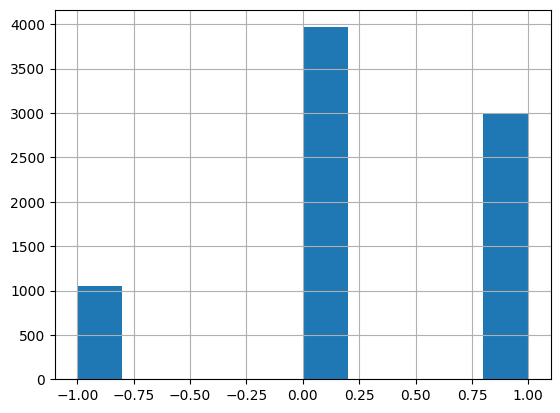

In [55]:
reviews_test['sentiment_label'].hist()

In [53]:
f1_score(reviews_test['sentiment_label'], y_test_predicted, average='weighted')

0.6801383920455008